# Étude de marché: Projet d'entreprise IAA souhaitant exporter du poulet

*Etude data - Projet 5 - Nalron (novembre 2019) / ENSAE-ENSAI Formation Continue*

*Data source* [FAO](http://www.fao.org/faostat/fr/#data)\
*Industrie Agroalimentaire (en abrégé IAA)* 

---

**Rappel du contexte**

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

**Objectif :** Aider à cibler plus particulièrement certains pays, dans le but d'approfondir ensuite l'étude de marché. L'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).

**Mission :**
Identifier les pays propices à une insertion dans le marché du poulet. Afin de de pouvoir identifier les pays "cibles", il sera également nécessaire d'étudier <u>les régimes alimentaires de chaque pays</u>, notamment en termes de protéines d'origine animale et en termes de calories.

Travail sur **l'élaboration d'un échantillon** contenant l'ensemble des pays disponibles, chacun caractérisé par les variables suivantes :

- Différence de population entre une année antérieure (ici 2012) et l'année courante (ici 2013), exprimée en pourcentage.
- Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
- Disponibilité alimentaire en protéines par habitant.
- Disponibilité alimentaire en calories par habitant.

Pour parvenir à réaliser au mieux cette mission, quelques étapes indispensables seront nécessaires, comme par exemple :

- Construire un dendrogramme contenant l'ensemble des pays étudiés, puis couper afin d'obtenir 5 groupes.
- Caractériser chacun de ces groupes selon les variables cités précédemment.
- Enrichir les caractéristiques des pays en intégrant d'autres variables pertinentes, comme le PIB par habitant.
- Calculer la position des centroïdes de chacun des groupes, puis les commenter, les critiquer afin de conclure.
- Donner une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Et enfin, il sera pertinent de visualiser les partitions dans le premier plan factoriel obtenu par ACP. Dans la partition obtenue, on distinguera des clusters, des groupes distincts. Une étape de vérification sera alors nécessaire pour mettre en évidence les divergences. Pour cela, faire les tests statistiques suivants :

- Un *test d'adéquation* : parmi les 4 variables, ou parmi d'autres variables pertinentes, trouver une variable dont la loi est normale.
- Un *test de comparaison de deux populations (dans le cas gaussien)* : choix de 2 clusters parmi ceux déterminés. Sur ces 2 clusters, il est nécessaire de tester la variable gaussienne grâce à un test de comparaison.


In [1]:
#Import des librairies Python
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 0.25.3
Pandas : 0.25.3
Numpy : 1.17.4
Seaborn : 0.9.0


### Chargement et nettoyage de nos données

In [5]:
#Import des fichiers csv extraits directement de la base de données du site de la FAO
#http://www.fao.org/faostat/fr/#data
animal = pd.read_csv('p5_data/animal.csv')
vegetal = pd.read_csv('p5_data/vegetal.csv')
population = pd.read_csv('p5_data/population.csv')
pib = pd.read_csv('p5_data/pib.csv')

In [6]:
#Recherche d'éventuelles valeurs en doublon avec la fonction .duplicated()
print('Valeurs en doublon sur les données extraites du fichier animal : ' + str(animal.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier vegetal : ' + str(vegetal.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier population : ' + str(population.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier pib : ' + str(pib.duplicated().sum()))

Valeurs en doublon sur les données extraites du fichier animal : 0
Valeurs en doublon sur les données extraites du fichier vegetal : 0
Valeurs en doublon sur les données extraites du fichier population : 0
Valeurs en doublon sur les données extraites du fichier pib : 0


In [7]:
#Recherche d'éventuelles valeurs manquantes avec la fonction .isna()
print('Valeurs manquantes sur les données extraites du fichier animal : ' + str(animal.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier vegetal : ' + str(vegetal.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier population : ' + str(population.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier pib : ' + str(pib.duplicated().isna().any().sum()))

Valeurs manquantes sur les données extraites du fichier animal : 0
Valeurs manquantes sur les données extraites du fichier vegetal : 0
Valeurs manquantes sur les données extraites du fichier population : 1
Valeurs manquantes sur les données extraites du fichier pib : 0


In [8]:
#Analyse de la valeur manquante des données du fichier population.csv
population.isna().any()

Code Domaine              False
Domaine                   False
Code Pays                 False
Pays                      False
Code Élément              False
Élément                   False
Code Produit              False
Produit                   False
Code Année                False
Année                     False
Unité                     False
Valeur                    False
Symbole                    True
Description du Symbole    False
dtype: bool

-> Aucune importance puisque la variable concernée (*Symbole*) ne sera pas utile dans l'analyse.

In [9]:
#Première mise en situation des données issues des fichiers csv 'animal' et 'végétal'
#Affichage des colonnes 
print(animal.columns)
print(vegetal.columns)

Index(['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')


-> Les colonnes sont identiques, elles ne seront pas toutes utiles pour l'analyse. Voyons dans un premier temps lesquelles doivent être exclues de l'analyse.

In [10]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
animal.drop(['Code Domaine', 'Domaine', 'Code Année', 'Symbole', 'Description du Symbole'],  axis=1, inplace=True)
vegetal.drop(['Code Domaine', 'Domaine', 'Code Année', 'Symbole', 'Description du Symbole'],  axis=1, inplace=True)

In [11]:
#Ajout d'une variable 'Origine' avant jointure pour conserver la provenance des observations
#Opération réalisée sur les fichiers csv 'animal' et 'végétal'
vegetal = pd.read_csv('p5_data/vegetal.csv')
vegetal['Origine'] = 'Végétale'
animal = pd.read_csv('p5_data/animal.csv')
animal['Origine'] = 'Animale'

#Application d'une jointure pour faciliter l'étude des observations par méthode .concat()
animal_vegetal = pd.concat([animal, vegetal])
animal_vegetal.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole,Origine
0,FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2013,2013,Kcal/personne/jour,216.00,Fc,Donnée calculée,Animale
1,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2013,2013,g/personne/jour,12.22,Fc,Donnée calculée,Animale
2,FBS,Bilans Alimentaires,2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2941,Produits Animaux,2013,2013,g/personne/jour,15.24,Fc,Donnée calculée,Animale
3,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,Animale
4,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,Animale


In [12]:
#Analyse faite sur des données représentatives de l'année 2013 
#2013 étant l'année la plus récente disponible dans les bilans alimentaires de la FAO
print(animal_vegetal['Année'].unique())

[2013]


In [13]:
#Analyse des modalités de la variable 'Élément' qui semble avoir une importance pour l'étude
#Fonction .unique() permet de les afficher
animal_vegetal['Élément'].unique()

array(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres Utilisations',
       'Variation de stock', 'Traitement'], dtype=object)

-> Les modalités ci-dessus sont en effet fondamentales pour la suite… Voyons immédiatement comment les exploiter.

In [14]:
#Méthode .pivot_table() utile pour rendre le dataframe exploitable selon les modalités précédentes
animal_vegetal = animal_vegetal.pivot_table(index=['Pays', 'Origine'], 
                                            columns='Élément', values='Valeur', aggfunc=sum).reset_index()
animal_vegetal.head()

Élément,Pays,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Animale,123.0,0.0,432.0,79.92,30.47,24.43,2631.0,0.0,350.0,2442.0,63.0,2280.0,2.0,NaN,NaN
1,Afghanistan,Végétale,645.0,415.0,3744.0,271.49,36.55,92.08,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
2,Afrique du Sud,Animale,187.0,115.0,975.0,139.63,69.35,72.77,7817.0,1088.0,1049.0,7371.0,83.0,7614.0,67.0,0.0,241.0
3,Afrique du Sud,Végétale,5122.0,761.0,5067.0,425.17,97.85,97.88,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
4,Albanie,Animale,101.0,2.0,1972.0,389.05,135.44,118.83,1432.0,10.0,87.0,1235.0,94.0,1355.0,0.0,0.0,0.0


In [15]:
#Suppression des colonnes inutiles pour l'analyse, conservation de toutes les disponibilités, des origines et pays
animal_vegetal.drop(['Aliments pour animaux', 'Autres Utilisations','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)',
                'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture',
                'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock'], axis=1, inplace=True)
animal_vegetal.head()

Élément,Pays,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,Animale,432.0,24.43
1,Afghanistan,Végétale,3744.0,92.08
2,Afrique du Sud,Animale,975.0,72.77
3,Afrique du Sud,Végétale,5067.0,97.88
4,Albanie,Animale,1972.0,118.83


In [16]:
#Visualisation rapide de la taille du dataframe "animal_vegetal"
animal_vegetal.shape

(342, 4)

-> 342 observations toutes origines confondues. 

Le fil conducteur de l'étude étant l'exportation de poulets à l'International, **voyons tout de suite la part des disponibilités animales**.

In [17]:
#Création d'un nouveau dataframe selon une restriction faite sur l'origine animale 
prot_animal = animal_vegetal[animal_vegetal['Origine'] == 'Animale'].reset_index(drop=True)
del prot_animal['Origine']
prot_animal.head()

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,432.0,24.43
1,Afrique du Sud,975.0,72.77
2,Albanie,1972.0,118.83
3,Algérie,757.0,49.97
4,Allemagne,2086.0,122.97


In [18]:
#Visualisation rapide de la taille du dataframe "prot_animal"
prot_animal.shape

(171, 3)

In [19]:
#Création d'un nouveau dataframe issu d'une agrégation par pays, avec somme de toutes les disponibilités 
df = animal_vegetal.groupby('Pays').sum().reset_index()
df.head()

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,4176.0,116.51
1,Afrique du Sud,6042.0,170.65
2,Albanie,6381.0,222.79
3,Algérie,6589.0,183.88
4,Allemagne,7001.0,202.98


In [20]:
#Visualisation rapide de la taille du dataframe "df"
df.shape

(171, 3)

A ce stade de l'analyse nous avons un dataframe qui recense les disponibilités par pays selon une restriction sur l'origine animale ("*prot_animal*"), un dataframe global qui recense les disponibilités animales + végétales ("*df*"). Les éléments sont désormais disponibles pour sortir une nouvelle dimension représentant la **proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays**.

In [21]:
#Intégration d'une nouvelle variable pour évaluer la proportion citée précédemment 
df['%Protéines animale/protéines totales'] = round(prot_animal['Disponibilité de protéines en quantité (g/personne/jour)'] / animal_vegetal['Disponibilité de protéines en quantité (g/personne/jour)'] *100, 2)
df.head()

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales
0,Afghanistan,4176.0,116.51,100.00
1,Afrique du Sud,6042.0,170.65,79.03
2,Albanie,6381.0,222.79,163.30
3,Algérie,6589.0,183.88,51.05
4,Allemagne,7001.0,202.98,103.48


Maintenant voyons les données du fichier population.csv, il est important de pouvoir obtenir la différence de population entre une année antérieure (ici 2012) et l'année courante (ici 2013), exprimée en pourcentage. De ce fait, nous aurons un indicateur par pays pour avoir une idée de l'évolution démographique enregistrée sur une année.

In [22]:
#population.csv pour rappel, nous avons vu qu'une sélection de colonnes était nécessaire 
population.drop(['Code Domaine', 'Domaine','Code Élément', 'Code Produit', 'Produit', 
                 'Code Année', 'Unité', 'Symbole', 'Description du Symbole'], axis=1, inplace=True)

In [23]:
#Visualisation rapide des données 
population.head()

,Code Pays,Pays,Élément,Année,Valeur
0,2,Afghanistan,Population totale,2012,29825
1,2,Afghanistan,Population totale,2013,30552
2,202,Afrique du Sud,Population totale,2012,52386
3,202,Afrique du Sud,Population totale,2013,52776
4,3,Albanie,Population totale,2012,3162


In [24]:
#Restriction des données sur l'année 2012 puis 2013, constitution de deux sous-ensembles
population_2012 = population[population['Année'] == 2012]
del population_2012['Année']
del population_2012['Élément']

population_2013 = population[population['Année'] == 2013]
del population_2013['Année']
del population_2013['Élément']

In [25]:
#Jointure des deux années afin d'élaborer un seul dataframe que l'on nommera "population_pays"
population_pays = pd.merge(population_2012, population_2013, on='Pays')
population_pays.drop(['Code Pays_y'], axis=1, inplace=True)
population_pays

,Code Pays_x,Pays,Valeur_x,Valeur_y
0,2,Afghanistan,29825,30552
1,202,Afrique du Sud,52386,52776
2,3,Albanie,3162,3173
3,4,Algérie,38482,39208
4,79,Allemagne,82800,82727
...,...,...,...,...
166,237,Viet Nam,90796,91680
167,249,Yémen,23852,24407
168,251,Zambie,14075,14539
169,181,Zimbabwe,13724,14150


In [26]:
#Noms des variables re-travaillés 
population_pays.rename(columns={'Code Pays_x': 'Code Pays', 'Valeur_x': 'Population 2012', 
                                'Valeur_y': 'Population 2013'}, inplace=True)

In [27]:
#Intégration d'une nouvelle variable qui donnera le pourcentage d'évolution entre 2012 et 2013
population_pays['%Evolution Population 2012/2013'] = round(((population_pays['Population 2013'] - population_pays['Population 2012']))\
                                           / population_pays['Population 2012'] *100, 2)
population_pays.head()

,Code Pays,Pays,Population 2012,Population 2013,%Evolution Population 2012/2013
0,2,Afghanistan,29825,30552,2.44
1,202,Afrique du Sud,52386,52776,0.74
2,3,Albanie,3162,3173,0.35
3,4,Algérie,38482,39208,1.89
4,79,Allemagne,82800,82727,-0.09


In [28]:
#Jointure interne du dataframe principal "df" et "population_pays"
df = pd.merge(df, population_pays[['Pays', '%Evolution Population 2012/2013']], on='Pays')
df.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013
0,Afghanistan,4176.0,116.51,100.00,2.44
1,Afrique du Sud,6042.0,170.65,79.03,0.74
2,Albanie,6381.0,222.79,163.30,0.35
3,Algérie,6589.0,183.88,51.05,1.89
4,Allemagne,7001.0,202.98,103.48,-0.09


In [29]:
#Visualisation rapide de la taille du dataframe "df"
df.shape

(171, 5)

Le dataframe df nous donne une vision par pays des différentes disponibilités, ainsi que les deux ratios attendus sur les protéines et l'évolution démographique entre l'année n et n-1. A ce stade de l'analyse, il semble légitime de s'interroger sur l'échantillon que nous avons, est-il suffisamment représentatif du marché? Un ajout de nouvelle(s) variable(s)? 

On peut aller plus loin dans nos variables, enrichir les caractéristiques des pays, c'est pourquoi le PIB par habitant trouvera tout son sens dans l'analyse du potentiel d'un pays à faire appel (ou non)à nos services alimentaires.

In [30]:
#Enrichissement de l'échantillon "df" en intégrant la variable PIB / habitant sur 2013 pour chacun des pays
#Visualisation rapide de nos données sur le PIB 
pib.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,1807.8,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,12357.7,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,10492.7,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,13322.6,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,42914.5,X,Sources internationales sûres,NaN


In [31]:
#Sélection des colonnes 'Zone' et 'Valeur', les autres ne sont pas nécessaires dans notre cas
pib = pib[['Zone', 'Valeur']]
pib.rename(columns={'Zone': 'Pays','Valeur': 'PIB/habitant US$'}, inplace=True)
pib['PIB/habitant US$'] = round(pib['PIB/habitant US$'], 2)

In [32]:
#Visualisation rapide de la taille du dataframe "pib"
pib.shape

(185, 2)

In [33]:
#Jointure entre "df" et "pib" pour l'intégration de la nouvelle variable 'PIB/habitant US$'
#"pib" dénombre vraisemblablement plus de pays que ceux de notre échantillon
#"df" reste l'échantillon référence de l'analyse, la jointure avec "pib" sera interne condition left
df = pd.merge(df, pib, on='Pays', how='left')
df.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,PIB/habitant US$
0,Afghanistan,4176.0,116.51,100.00,2.44,1807.8
1,Afrique du Sud,6042.0,170.65,79.03,0.74,12357.7
2,Albanie,6381.0,222.79,163.30,0.35,10492.7
3,Algérie,6589.0,183.88,51.05,1.89,13322.6
4,Allemagne,7001.0,202.98,103.48,-0.09,42914.5


In [34]:
#Visualisation rapide de la taille du dataframe "df"
df.shape

(171, 6)

Allons plus loin, d'autres dimensions doivent-être explorées pour affiner l'analyse du marché du poulet à l'International.  Par exemple, avoir une visibilité sur le potentiel marché en intégrant une nouvelle variable qui aura pour but d'indiquer **la capacité d'un pays d'importer du poulet vivant**, donc potentiellement demandeur de nos poulets Français.

In [35]:
#Ajout d'une variable supplémentaire pour avoir une idée de la capacité d'importation de poulets vivants / pays
#Source : http://www.fao.org/faostat/fr/?#data/TA
importation_poulet = pd.read_csv('p5_data/importation.csv')

In [36]:
#Visualisation rapide des données sur le genre d'importation par les pays
importation_poulet.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2013,2013,1000 US$,3415.0,R,Données estimées en utilisant les données des ...
1,TA,Animaux vivants,202,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2013,2013,1000 US$,8287.0,NaN,Donnée officielle
2,TA,Animaux vivants,3,Albanie,5622,Importations - Valeur,1057,Poulets,2013,2013,1000 US$,5821.0,NaN,Donnée officielle
3,TA,Animaux vivants,4,Algérie,5622,Importations - Valeur,1057,Poulets,2013,2013,1000 US$,22905.0,NaN,Donnée officielle
4,TA,Animaux vivants,79,Allemagne,5622,Importations - Valeur,1057,Poulets,2013,2013,1000 US$,173124.0,NaN,Donnée officielle


In [37]:
#Sélection des colonnes 'Zone' et 'Valeur', les autres caractéristiques ne sont pas nécessaires dans nos recherches
importation_poulet = importation_poulet[['Zone', 'Valeur']]
importation_poulet.rename(columns={'Zone': 'Pays', 'Valeur': 'Import Poulet en valeur 1000 US$'}, inplace=True)

In [38]:
#Visualisation rapide de la taille du dataframe "importation_poulet"
importation_poulet.shape

(197, 2)

In [39]:
#Jointure entre "df" et "importation_poulet" pour l'intégration de la nouvelle variable 
#"importation_poulet" dénombre vraisemblablement plus de pays que ceux de notre échantillon
#"df" reste l'échantillon référence de l'étude, la jointure avec "importation_poulet" sera interne condition left
df = pd.merge(df, importation_poulet, on='Pays', how='left')
df.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,PIB/habitant US$,Import Poulet en valeur 1000 US$
0,Afghanistan,4176.0,116.51,100.00,2.44,1807.8,3415.0
1,Afrique du Sud,6042.0,170.65,79.03,0.74,12357.7,8287.0
2,Albanie,6381.0,222.79,163.30,0.35,10492.7,5821.0
3,Algérie,6589.0,183.88,51.05,1.89,13322.6,22905.0
4,Allemagne,7001.0,202.98,103.48,-0.09,42914.5,173124.0


In [40]:
#Visualisation rapide de la taille de l'échantillon sur lequel l'analyse sera réalisée
df.shape

(171, 7)

Toujours dans la même logique d'enrichissement de notre échantillon, il peut-être pertinent d'intégrer des données sur **la capacité d'élevage des poulets par pays**. Intégrons une variable supplémentaire dans ce sens.

In [41]:
#Ajout d'une variable supplémentaire concernant l'élevage de poulets / pays
#Source : http://www.fao.org/faostat/fr/?#data/QA
elevage_poulet = pd.read_csv('p5_data/elevage.csv')

In [42]:
#Visualisation rapide des données sur l'élevage de poulets par les pays
elevage_poulet.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,QA,Élevage,2,Afghanistan,5112,Réserves,1057,Poulets,2013,2013,1000 têtes,12053.0,NaN,Donnée officielle
1,QA,Élevage,202,Afrique du Sud,5112,Réserves,1057,Poulets,2013,2013,1000 têtes,161600.0,NaN,Donnée officielle
2,QA,Élevage,3,Albanie,5112,Réserves,1057,Poulets,2013,2013,1000 têtes,8928.0,NaN,Donnée officielle
3,QA,Élevage,4,Algérie,5112,Réserves,1057,Poulets,2013,2013,1000 têtes,130000.0,F,Estimation FAO
4,QA,Élevage,79,Allemagne,5112,Réserves,1057,Poulets,2013,2013,1000 têtes,160774.0,NaN,Donnée officielle


In [43]:
#Sélection des colonnes 'Zone' et 'Valeur', les autres caractéristiques ne sont pas nécessaires dans nos recherches
elevage_poulet = elevage_poulet[['Zone', 'Valeur']]
elevage_poulet.rename(columns={'Zone': 'Pays', 'Valeur': 'Élevage Poulet 1000 têtes'}, inplace=True)

In [44]:
#Visualisation rapide de la taille du dataframe 'elevage_poulet'
elevage_poulet.shape

(209, 2)

In [45]:
#Jointure entre "df" et "elevage_poulet" pour l'intégration de la nouvelle variable 
#"elevage_poulet" dénombre vraisemblablement plus de pays que ceux de notre échantillon
#"df" reste l'échantillon référence de l'étude, la jointure avec "elevage_poulet" sera interne condition left
df = pd.merge(df, elevage_poulet, on='Pays', how='left')
df.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,PIB/habitant US$,Import Poulet en valeur 1000 US$,Élevage Poulet 1000 têtes
0,Afghanistan,4176.0,116.51,100.00,2.44,1807.8,3415.0,12053.0
1,Afrique du Sud,6042.0,170.65,79.03,0.74,12357.7,8287.0,161600.0
2,Albanie,6381.0,222.79,163.30,0.35,10492.7,5821.0,8928.0
3,Algérie,6589.0,183.88,51.05,1.89,13322.6,22905.0,130000.0
4,Allemagne,7001.0,202.98,103.48,-0.09,42914.5,173124.0,160774.0


In [46]:
#Vérification d'éventuelles valeurs manquantes et/ou en doubles dans l'échantillon
print(df.duplicated().sum())
print(df.isna().sum())

0
Pays                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
%Protéines animale/protéines totales                        0
%Evolution Population 2012/2013                             0
PIB/habitant US$                                            6
Import Poulet en valeur 1000 US$                            8
Élevage Poulet 1000 têtes                                   2
dtype: int64


In [47]:
#Identification des valeurs manquantes de la colonne 'Import Poulet en valeur 1000 US$' par fonction .isnull()
df[df['Import Poulet en valeur 1000 US$'].isnull()]

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,PIB/habitant US$,Import Poulet en valeur 1000 US$,Élevage Poulet 1000 têtes
10,Australie,6553.0,212.55,389.59,1.27,43218.3,NaN,98653.0
42,Djibouti,5216.0,131.47,57.08,1.51,NaN,NaN,NaN
79,Kiribati,6082.0,146.67,59.74,0.99,1852.9,NaN,610.0
130,République populaire démocratique de Corée,4187.0,110.00,84.02,0.53,NaN,NaN,15309.0
148,Tchad,4219.0,125.47,20.03,3.03,1993.9,NaN,6000.0
151,Timor-Leste,4261.0,115.03,33.86,1.71,8887.1,NaN,820.0
155,Turkménistan,5676.0,181.00,82.58,1.30,13235.8,NaN,16000.0
170,Îles Salomon,4773.0,112.68,22.83,2.00,2107.7,NaN,240.0


In [48]:
#Correction des NaN de la variable 'Import Poulet en valeur 1000 US$'
#Il est préférable de conserver ces pays, les NaN seront donc remplacées par des valeurs nulles
df['Import Poulet en valeur 1000 US$'].fillna(0, inplace=True)

In [49]:
#Correction des deux NaN de la variable 'Élevage Poulet 1000 têtes'
#Le plus judicieux est l'affectation d'une valeur nulle pour ne pas prendre en compte ces deux pays dans l'élevage
df['Élevage Poulet 1000 têtes'].fillna(0, inplace=True)

In [50]:
#Correction des NaN de la variable 'PIB/habitant US$'
#Il est préférable de conserver ces pays, les NaN seront donc remplacées par la moyenne des PIB
df['PIB/habitant US$'].fillna(df['PIB/habitant US$'].mean(), inplace=True)

In [51]:
#Visualisation rapide de la taille de notre échantillon
df.shape

(171, 8)

L'entreprise étant implantée en France Métropolitaine, et sachant que le projet est celui d'exporter du poulet à l'International, notre pays la France ne sera pas utile dans l'analyse, il sera donc exclu. L'analyse sera donc réalisée sur **170 observations (Pays) par 7 variables quantitatives**.

In [52]:
#Retrait du pays 'France' sur notre échantillon 
df = df[df['Pays'] != 'France']

Nos variables initiales étant incontournables dans l'analyse du potentiel marché ciblé, nous commencerons l'exploration uniquement à partir de ces 4 variables. Cet échantillon de 170 pays par 4 variables quantitatives sera nommé "df_alim", **le régime alimentaire des pays étant le premier axe de travail**.

In [53]:
#Élaboration d'un échantillon basé uniquement sur nos 4 premières variables
df_alim = df.iloc[:, :5]
df_alim.shape

(170, 5)

In [54]:
#Nos 4 variables quantitatives pour effectuer le partionnement des groupes selon l'approche alimentaire
df_alim.columns

Index(['Pays', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       '%Protéines animale/protéines totales',
       '%Evolution Population 2012/2013'],
      dtype='object')

In [55]:
#Notre corpus de l'ensemble des variables 
df.columns

Index(['Pays', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       '%Protéines animale/protéines totales',
       '%Evolution Population 2012/2013', 'PIB/habitant US$',
       'Import Poulet en valeur 1000 US$', 'Élevage Poulet 1000 têtes'],
      dtype='object')

In [56]:
#Description rapide de notre corpus de variables
df.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),%Protéines animale/protéines totales,%Evolution Population 2012/2013,PIB/habitant US$,Import Poulet en valeur 1000 US$,Élevage Poulet 1000 têtes
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,5681.064706,161.503118,111.497941,1.343294,16908.732032,13348.323529,1.208753e+05
std,878.422033,39.402559,114.797923,1.250699,16615.411782,55720.594595,4.388130e+05
min,3758.000000,75.320000,9.150000,-0.770000,678.300000,0.000000,0.000000e+00
25%,5028.500000,127.820000,46.467500,0.432500,4286.675000,254.750000,4.827250e+03
50%,5644.500000,161.730000,82.365000,1.225000,12025.500000,2157.500000,2.130000e+04
75%,6355.500000,187.375000,128.172500,2.057500,23339.025000,7309.000000,6.354900e+04
max,7538.000000,266.600000,857.190000,9.600000,90656.400000,614024.000000,4.835178e+06


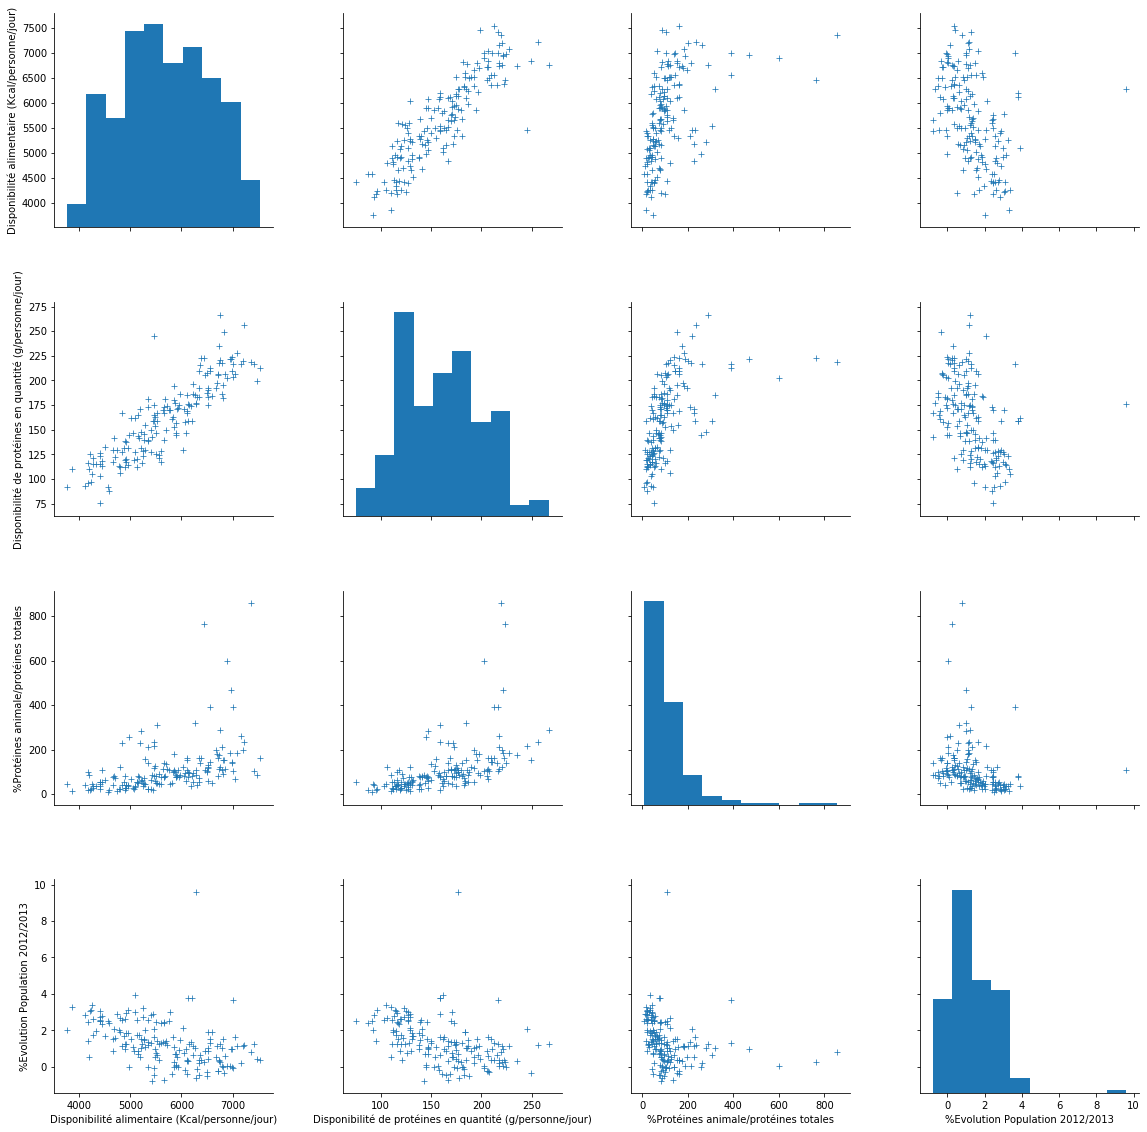

In [57]:
#Premier aperçu des 4 variables initiales (régime alimentaire des pays) 
#Affichage des variables deux à deux avec leur mode de distribution
sns.pairplot(df_alim, height=4, markers="+")
plt.show()

Quelques remarques peuvent-être apportées, comme la corrélation linéaire de la disponibilité en protéines / disponibilité calorique. On a également une idée de la distribution de nos 4 principales variables, avec par exemple une distribution étalée à droite pour le ratio des protéines, ou encore une distribution plutôt symétrique, c'est à dire une distribution normale pour la disponibilité calorique. **Voyons comment élaborer le partitionnement adéquat aux objectifs fixés**.

[Suite de l'analyse par de la réduction dimensionnelle (ACP) + partitionnement par le clustering hiérarchique et clustering KMeans](https://github.com/nalron/project_market_study/blob/french_version/p5_notebook02.ipynb)